# Question 2
You can find this code on my GitHub account: https://github.com/MaximilianJHuber/NYU
## d.)

In [1]:
p = 0.95; q = 0.95
μ = [1.02, 0.98]
β = 0.98; γ = 2
Q = [p 1-p; 1-q q];

In [2]:
Rf = β^-1 * (Q*exp(-γ*μ))

2-element Array{Float64,1}:
 0.133235
 0.143181

In [3]:
q = inv(eye(2) - β*Q)*exp(-γ*μ)

2-element Array{Float64,1}:
 6.72629
 6.81807

In [4]:
ER = (Q * (1+q).*exp(μ)) ./ q

2-element Array{Float64,1}:
 3.18738
 3.05346

In [5]:
ERexcess = ER - Rf

2-element Array{Float64,1}:
 3.05414
 2.91028

## e.)
The stationary distribution is the solution to:
$$\pi=Q' \pi$$
that is the right eigenvalues of $Q'$.

In [6]:
π = eigvecs(Q')[:,2] / norm(eigvecs(Q')[:,2],1)

2-element Array{Float64,1}:
 0.5
 0.5

In [7]:
uER = π' * ER

1-element Array{Float64,1}:
 3.12042

In [8]:
uERexcess = π' * ERexcess

1-element Array{Float64,1}:
 2.98221

## f.)

In [9]:
function calcReturns(γ::Real; β = 0.98, Q = [0.95 0.05; 0.05 0.95], μ = [1.02, 0.98])
    Rf = β^-1 * (Q*exp(-γ*μ))
    q = inv(eye(2) - β*Q)*exp(-γ*μ)
    ER = (Q * (1+q).*exp(μ)) ./ q
    ERexcess = ER - Rf
    π = eigvecs(Q')[:,2] / norm(eigvecs(Q')[:,2],1)
    
    VR = (Q * ((1+q).^2).*(exp(μ).^2)) ./ q.^2 - ER.^2
    
    return [(π' * ER)[1], sqrt((π' * VR)[1]), (π' * Rf)[1]]
end

calcReturns (generic function with 1 method)

In [10]:
X = Array(Float64,100,3)
γs = linspace(0.5,5,100)
for i in 1:100
    X[i,:] = calcReturns(γs[i])
end

In [11]:
using Plots
pyplot()

Plots.PyPlotBackend()


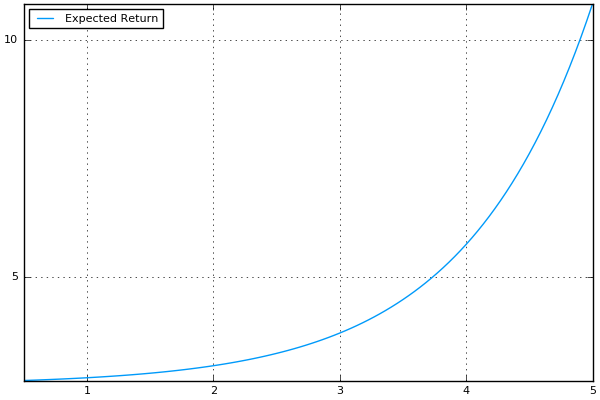

In [12]:
plot(γs, X[:,1], label="Expected Return")


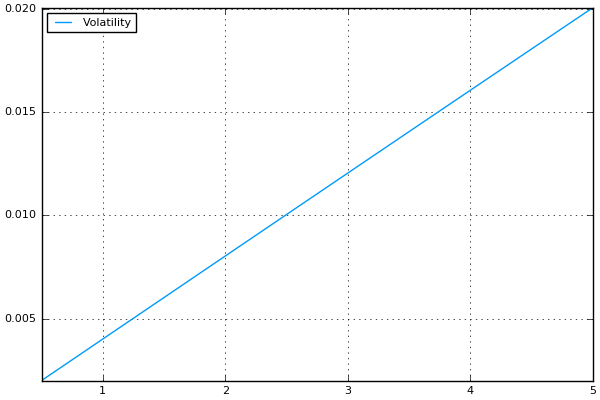

In [13]:
plot(γs, X[:,2], label="Volatility")


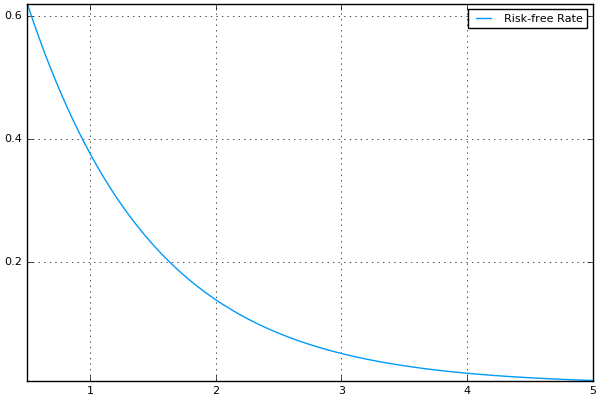

In [14]:
plot(γs, X[:,3], label="Risk-free Rate")